In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [124]:
FLAVORS=['nue','nuebar','numu','numubar']
def get_all_fluxes(horn):
    flux={}
    el = {}
    er = {}
    ec = {}
    de = {}
    for nu in FLAVORS:
        flux[nu]= np.genfromtxt(f"{nu}{horn}.txt",skip_header=0)[0]
    return flux

en=np.linspace(0,200*0.5,200+1)
de=0.5
el=en[:-1]
er=en[1:]
ec=el+de/2.0
fhc =get_all_fluxes('FHC')
rhc =get_all_fluxes('RHC')

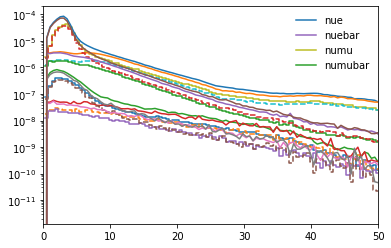

In [125]:
myE = np.linspace(0,50.0,100)
interp_fhc={}
interp_rhc={}
for nu in FLAVORS:
    plt.step(ec, fhc[nu],label=nu, where='post')
    plt.step(ec, rhc[nu],ls='--', where='post')
    func=interpolate.interp1d(ec,fhc[nu]/0.5,bounds_error=False,fill_value=0,kind='nearest')
    interp_fhc[nu]=func(myE)
    plt.plot(myE,interp_fhc[nu])
   
    func=interpolate.interp1d(ec,rhc[nu]/0.5,bounds_error=False,fill_value=0,kind='nearest')
    interp_rhc[nu]=func(myE)
    plt.plot(myE,interp_rhc[nu])

plt.xlim(0.0,50)
# plt.ylim(1e-3,1e2)
plt.yscale('log')
plt.legend(frameon=False)

In [127]:
np.sum(interp_fhc['numu']*1e-4*(myE[1]-myE[0]))

2.8583948929292935e-08

In [128]:
globes_fhc = [myE, 
                interp_fhc['nue'],
              interp_fhc['numu'],
              interp_fhc['numu']*0,
                interp_fhc['nuebar'],
              interp_fhc['numubar'],
              interp_fhc['numu']*0]              

globes_rhc = [myE, 
                interp_rhc['nue'],
              interp_rhc['numu'],
              interp_rhc['numu']*0,
                interp_rhc['nuebar'],
              interp_rhc['numubar'],
              interp_rhc['numu']*0]              

In [129]:
np.savetxt("../NUMI_FHC_LE.dat",np.array(globes_fhc).T,header='nus/m^2/GeV/1e0POT')
np.savetxt("../NUMI_RHC_LE.dat",np.array(globes_rhc).T,header='nus/m^2/GeV/1e0POT')

In [130]:
f=np.loadtxt("../NOvA_FHC.dat",unpack=True)
r=np.loadtxt("../NOvA_RHC.dat",unpack=True)

nf=np.loadtxt("../ND280_FHC.dat",unpack=True)
nr=np.loadtxt("../ND280_RHC.dat",unpack=True)

nuf=np.loadtxt("../NUMI_FHC_LE.dat",unpack=True)
nur=np.loadtxt("../NUMI_RHC_LE.dat",unpack=True)

In [131]:
e,numu=np.genfromtxt('numuFHC_ME_unofficial.dat',unpack=True)

globes_fhc = [e, 
                numu*0,
                numu,
                numu*0,
                numu*0,
                numu*0,
                numu*0]
np.savetxt("../NUMI_FHC_ME_unofficial.dat",np.array(globes_fhc).T,header='nus/m^2/GeV/1e0POT')


Text(0, 0.5, 'nus/m^2/1e6POT')

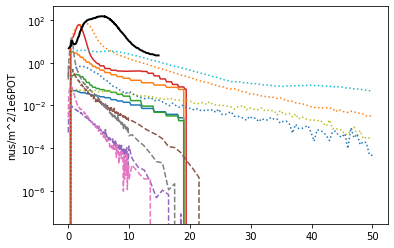

In [132]:
plt.plot(r[0],r[1])
plt.plot(r[0],r[2])
plt.plot(r[0],r[4])
plt.plot(r[0],r[5])
## test nd280
plt.plot(nr[0],nr[1]*1e-15*1e4,ls='--')
plt.plot(nr[0],nr[2]*1e-15*1e4,ls='--')
plt.plot(nr[0],nr[4]*1e-15*1e4,ls='--')
plt.plot(nr[0],nr[5]*1e-15*1e4,ls='--')
# ## test minos
plt.plot(nur[0],nur[1]*1e6,ls=':')
plt.plot(nur[0],nur[2]*1e6,ls=':')
plt.plot(nur[0],nur[4]*1e6,ls=':')
plt.plot(nur[0],nur[5]*1e6,ls=':')

plt.plot(e,numu*1e6,lw=2,c='black')
plt.yscale('log')

plt.ylabel("nus/m^2/1e6POT")

Text(0, 0.5, 'nus/m^2/1e6POT')

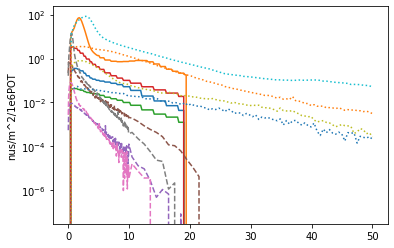

In [133]:
plt.plot(f[0],f[1])
plt.plot(f[0],f[2])
plt.plot(f[0],f[4])
plt.plot(f[0],f[5])
## test nd280
plt.plot(nf[0],nf[1]*1e-15*1e4,ls='--')
plt.plot(nf[0],nf[2]*1e-15*1e4,ls='--')
plt.plot(nf[0],nf[4]*1e-15*1e4,ls='--')
plt.plot(nf[0],nf[5]*1e-15*1e4,ls='--')
## test minos
plt.plot(nuf[0],nuf[1]*1e6,ls=':')
plt.plot(nuf[0],nuf[2]*1e6,ls=':')
plt.plot(nuf[0],nuf[4]*1e6,ls=':')
plt.plot(nuf[0],nuf[5]*1e6,ls=':')

# plt.plot(e,numu*1e6,lw=2,c='black')
plt.yscale('log')

plt.ylabel("nus/m^2/1e6POT")

In [121]:
np.max(e)

14.8577556

In [122]:
2.93×10−8

SyntaxError: invalid character '×' (U+00D7) (<ipython-input-122-ba524177a772>, line 1)

In [123]:
np.sum(nuf[2]*1e-4*(nuf[0][2]-nuf[0][1]))

1.3268362062832472e-07